In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, multinomial, geom

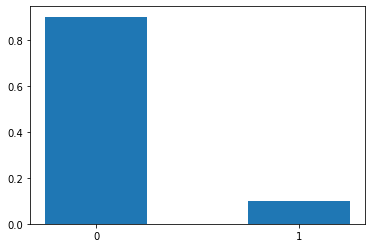

In [8]:
#Simuliamo il lancio di una moneta. p è la probabilità che esca testa, n il numero di lanci
p = 0.9
n = 1000

#La moneta potrebbe non essere equilibrata, generiamo un vettore di n numeri random tra 0 e 1
prove = np.random.rand(n)

#Ogni volta che un elemento è minore p, vuol dire che è uscita testa
#Per fare questa cosa utilizziamo il comando true, ovvero passiamo una condizione come 
#indice del vettore, otterremo come risultato un vettore con i soli elementi che 
#verificano la condizione

testa = prove[prove < p]
#print(testa)

#Dato che testa contiene tutti gli elementi < p, la sua lunghezza sarà il numero di volte 
#in cui è uscito testa
n_testa = testa.size

#Il numero di volte in cui è uscito croce sarà il numero totale di lanci meno le volte in cui 
#è uscita croce
n_croce = n - n_testa

#Plottiamo usando plt.bar
plt.xticks([0,1])
plt.bar([0,1], [n_testa/n, n_croce/n], width=0.5, align='center')
plt.show()

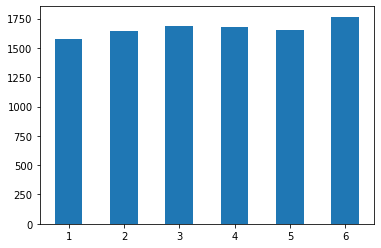

In [9]:
#Simuliamo n lanci del dado
n = 10000

#Se assumiamo che il dado sia equilibrato possiamo generare un vettore di n elementi con 
#valori random tra 1 e 6
dado = np.random.randint(1, 7, n) 

#Voglio sapere la frequenza con cui compare ogni numero estratto. Posso usare np.unique
#che restituisce una matrice: la prima riga contiene i numeri che compaiono in dado,
#la seconda riga la frequenza con cui questi compaiono.
F = np.unique(dado, return_counts=True)

#print(F)
#plotto l'istogramma dei risultati con le relative frequenze
plt.bar(F[0], F[1], width=0.5, align='center')
plt.show()

In [10]:
#Voglio calcolare il tempo di primo successo di una variabile binomiale di parametri p, n
#Esempio: lancio n volte la moneta, quando uscirà la prima volta testa, sapendo che la 
#probabilità di ottenere testa è p?
n = 50
m = 1000
p = 0.3

#Genera una matrice m x n di numeri random tra 0, 1
#Il mio esperimento consiste nel lenciare n volte la moneta 
#Ogni riga è una ripetizione del mio esperimento.

moneta = np.random.rand(m, n)

#Mi interessa la prima volta che si verifica l'evento, creo un vettore di m elementi
#in cui ogni elemento i mi dice il tempo di primo successo nella ripetizione i-esima
first_recurrence = np.zeros(m)

#Faccio un ciclo sulle righe della matrice e cerco il primo successo in ogni istanza
for i in range(m):
    #np.where mi restituisce un vettore contenente gli indici degli elementi che verificano
    #la condizione
    index = np.where(moneta[i] < p)
    #il tempo di primo successo sarà il primo di questi indici. Ma, dato che python conta 
    #da zero, dovremo sommare 1.
    first_recurrence[i]= index[0][0]+1
    

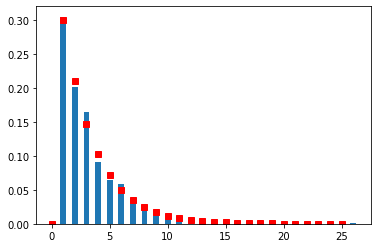

In [11]:
#Per fare l'istogramma dei tempi di primo successo usiamo, come prima, np.unique
F = np.unique(first_recurrence, return_counts=True)
k = range(int(np.max(first_recurrence)))

#Per normalizzare l'istogramma divido le frequenze per il numero di ripetizioni
plt.bar(F[0], F[1]/m, width=0.5, align='center')
#Plotto di sopra la distribuzione geometrica per confronto
plt.plot(k, geom.pmf(k, p), 'rs')
plt.show()